Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [13]:
file = pd.ExcelFile("../../../data/v4/Handballprojekt_1Liga fertig.xlsx")

file.sheet_names

df = file.parse('1. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


/Users/nayansavaliya/Desktop/HandballGameAnalysis/hba-venv/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Cleanup & Renaming

In [14]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,19.0,9.0,9.0,1.0,18.0,2.0,7.0,1.0,Heinevetter,194.0,186.0,0.0,1.0,NaN,NaN
1,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,32.0,17.0,16.0,1.0,20.0,2.0,9.0,1.0,Heinevedtter,194.0,186.0,0.0,2.0,7.0,1.0
2,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,40.0,22.0,18.0,1.0,44.0,2.0,8.0,1.0,Vujovic,196.0,186.0,1.0,3.0,9.0,1.0
3,SC Magdeburg,TVB 1898 Stuttgart,1.0,Magnusson,46.0,27.0,22.0,0.0,21.0,2.0,4.0,1.0,Vujovic,196.0,186.0,0.0,4.0,8.0,1.0
4,Rhein-Neckar Löwen,SC Magdeburg,2.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


Cleaning

In [15]:
df = df.loc[:,('homeTeam','opponentTeam','throwDirection','throwSuccess','name')].copy()
# Naming correction
df['homeTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['opponentTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)
df.loc[0, 'penaltyNo'] = 1
for i in range(1, len(df)):
    df.loc[i, 'penaltyNo'] = df.loc[i-1, 'penaltyNo']+1 if df.loc[i-1, 'homeTeam'] == df.loc[i, 'homeTeam'] and df.loc[i-1, 'opponentTeam'] == df.loc[i, 'opponentTeam'] else 1
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.sort_index(ascending=True)

,homeTeam,opponentTeam,throwDirection,throwSuccess,name,penaltyNo
0,SC Magdeburg,TVB 1898 Stuttgart,7.0,1.0,Magnusson,1.0
1,SC Magdeburg,TVB 1898 Stuttgart,9.0,1.0,Magnusson,2.0
2,SC Magdeburg,TVB 1898 Stuttgart,8.0,1.0,Magnusson,3.0
3,SC Magdeburg,TVB 1898 Stuttgart,4.0,0.0,Magnusson,4.0
4,SC Magdeburg,HSG Wetzlar,3.0,0.0,Magnusson,1.0
5,SC Magdeburg,HSG Wetzlar,8.0,1.0,Magnusson,2.0
6,SC Magdeburg,HSG Wetzlar,7.0,1.0,Magnusson,3.0
7,SC Magdeburg,HSG Wetzlar,8.0,1.0,Magnusson,4.0
8,HBW Balingen-Weilstetten,SC Magdeburg,1.0,1.0,Magnusson,1.0
9,HBW Balingen-Weilstetten,SC Magdeburg,1.0,1.0,Magnusson,2.0


In [16]:
df1 =pd.crosstab(df['penaltyNo'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,11,4,11,3,0,1,19,8,18,75
2.0,10,2,6,2,0,1,23,9,14,67
3.0,13,0,8,2,0,0,14,10,11,58
4.0,8,0,2,4,1,0,14,4,9,42
5.0,5,1,6,0,0,0,7,5,7,31
6.0,4,0,2,1,0,0,7,2,2,18
7.0,1,0,2,1,1,0,4,1,1,11
8.0,3,0,1,0,0,0,2,0,0,6
9.0,0,0,0,0,0,0,2,0,0,2


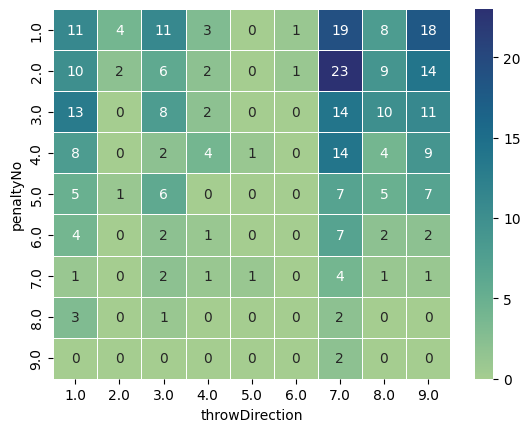

In [17]:
ax = sns.heatmap(pd.crosstab(df['penaltyNo'], df['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Success

In [18]:
dfs = df.loc[df['throwSuccess'] == 1]
df2 =pd.crosstab(dfs['penaltyNo'], dfs['throwDirection'], margins=True, margins_name="Total") 
df2

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,11,3,9,3,0,1,16,6,16,65
2.0,9,1,4,2,0,0,22,8,13,59
3.0,12,0,6,0,0,0,8,8,10,44
4.0,6,0,2,3,1,0,14,2,8,36
5.0,5,1,5,0,0,0,6,4,6,27
6.0,4,0,2,1,0,0,7,2,1,17
7.0,0,0,2,0,1,0,3,1,1,8
8.0,3,0,1,0,0,0,2,0,0,6
9.0,0,0,0,0,0,0,1,0,0,1


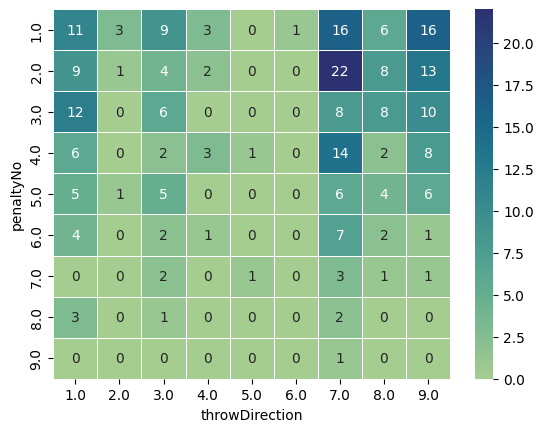

In [19]:
axs = sns.heatmap(pd.crosstab(dfs['penaltyNo'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Failed

In [20]:
dff = df.loc[df['throwSuccess'] == 0]
df3 =pd.crosstab(dff['penaltyNo'], dff['throwDirection'], margins=True, margins_name="Total") 
df3

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,
1.0,0,1,2,0,0,3,2,2,10
2.0,1,1,2,0,1,1,1,1,8
3.0,1,0,2,2,0,6,2,1,14
4.0,2,0,0,1,0,0,2,1,6
5.0,0,0,1,0,0,1,1,1,4
6.0,0,0,0,0,0,0,0,1,1
7.0,1,0,0,1,0,1,0,0,3
9.0,0,0,0,0,0,1,0,0,1
Total,5,2,7,4,1,13,8,7,47


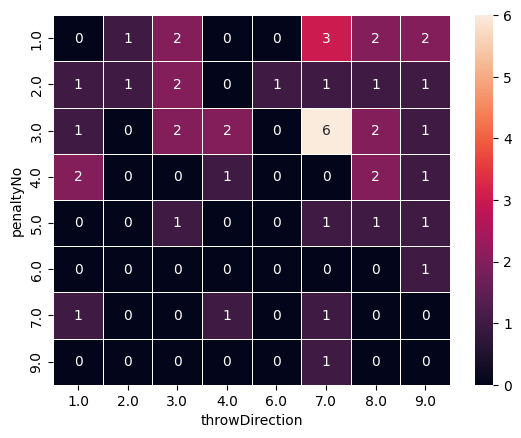

In [21]:
axf = sns.heatmap(pd.crosstab(dff['penaltyNo'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

Percentage Success

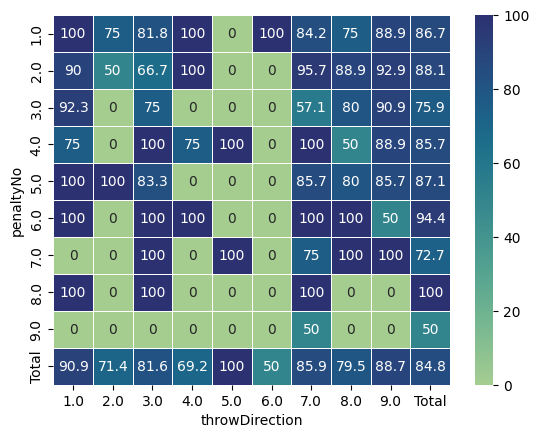

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,100.000000,75.000000,81.818182,100.000000,0.0,100.0,84.210526,75.000000,88.888889,86.666667
2.0,90.000000,50.000000,66.666667,100.000000,0.0,0.0,95.652174,88.888889,92.857143,88.059701
3.0,92.307692,0.000000,75.000000,0.000000,0.0,0.0,57.142857,80.000000,90.909091,75.862069
4.0,75.000000,0.000000,100.000000,75.000000,100.0,0.0,100.000000,50.000000,88.888889,85.714286
5.0,100.000000,100.000000,83.333333,0.000000,0.0,0.0,85.714286,80.000000,85.714286,87.096774
6.0,100.000000,0.000000,100.000000,100.000000,0.0,0.0,100.000000,100.000000,50.000000,94.444444
7.0,0.000000,0.000000,100.000000,0.000000,100.0,0.0,75.000000,100.000000,100.000000,72.727273
8.0,100.000000,0.000000,100.000000,0.000000,0.0,0.0,100.000000,0.000000,0.000000,100.000000
9.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,50.000000,0.000000,0.000000,50.000000


In [22]:
relSuccess = df2/df1*100
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess

Pattern